### To plot the figures

import functions

In [ ]:
from analysis_utils import adjacent_values
from analysis_utils import ax_plot_distanceRFcenter_v2
from analysis_utils import barplot_annotate_brackets
from analysis_utils import cal_distance_rf_center
from analysis_utils import cal_si
from analysis_utils import distance_resp
from analysis_utils import hist_customize
from analysis_utils import get_bk_resp
from analysis_utils import get_n_exp
from analysis_utils import get_visual_pos
from analysis_utils import plot_response
from analysis_utils import plot_response_scalebar
from analysis_utils import read_data_suite2p
from analysis_utils import rf_consistence
from analysis_utils import roi_type
from analysis_utils import scatter_hist
from analysis_utils import scatter_polyfit
from analysis_utils import violin_plot
from matplotlib.ticker import FormatStrFormatter

from other_utils import h5py_read

import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import scipy

### Set the parameter

In [ ]:
data_folder = './data'
unit_size = 10
n_cols = 6
n_rows = 4
snr_thr = 0.5
x_max = 50
F_delta_thr = 100 # in percentage
osi_thr = 0.25
figsize = (5, 5)

### Read the data

In [4]:
square_csv_path = os.path.join(data_folder, 'df_square.csv')
df_square = pd.read_csv(square_csv_path)

sinu_csv_path = os.path.join(data_folder, 'df_sinu.csv')
df_sinu = pd.read_csv(sinu_csv_path)

In [ ]:
# merge two dataframes
df = pd.concat([df_square, df_sinu], ignore_index=True)
is_exc_all = df['is_exc_all'].to_numpy()
is_inh_all = np.logical_not(is_exc_all)
pref_orth_diff = df['pref_orth_diff'].to_numpy()
sg_idx_snr = df['sg_idx_snr'].to_numpy()
sg0_idx_snr = df['sg0_idx_snr'].to_numpy()
sg0_osi_all = df['sg0_osi_all'].to_numpy()
sg0_osi_dich = df['sg0_osi_dich'].to_numpy()
sg1_si_salient_pref_all = df['sg1_si_salient_pref_all'].to_numpy()
sg2_rf_in = df['sg2_rf_in'].to_numpy()
smg_idx_snr = df['smg_idx_snr'].to_numpy()

In [ ]:
idx_os = sg0_osi_all > osi_thr
idx_no_os = sg0_osi_all <= osi_thr
sg1_si_salient_pref_higher = sg1_si_salient_pref_all > 0

In [ ]:
results = h5py_read(os.path.join(data_folder, 'data.hdf5'))
print(results.keys())

sg0_resp_0 = results['summary']['sg0_resp_0']
sg0_resp_90 = results['summary']['sg0_resp_90']
sg0_resp_pref = results['summary']['sg0_resp_pref']
sg0_resp_orth = results['summary']['sg0_resp_orth']
distance_rf_center = results['summary']['distance_rf_center']
is_exc = results['summary']['is_exc']
is_inh = results['summary']['is_inh']
sg0_idx_snr = results['summary']['sg0_idx_snr']

sg1_idx_snr = results['summary']['sg1_idx_snr']
sg1_resp_0 = results['summary']['sg1_resp_0']
sg1_resp_90 = results['summary']['sg1_resp_90']
sg1_resp_pref = results['summary']['sg1_resp_pref']
sg1_resp_orth = results['summary']['sg1_resp_orth']
sg1_salient_0 = results['summary']['sg1_salient_0']
sg1_salient_90 = results['summary']['sg1_salient_90']

smg0_idx_snr = results['summary']['smg0_idx_snr']
smg0_resp_pref = results['summary']['smg0_resp_pref']
smg0_resp_null = results['summary']['smg0_resp_null']

smg1_idx_snr = results['summary']['smg1_idx_snr']
smg1_resp_pref = results['summary']['smg1_resp_pref']
smg1_resp_null = results['summary']['smg1_resp_null']
smg1_salient_pref = results['summary']['smg1_salient_pref']
smg1_salient_null = results['summary']['smg1_salient_null']
pref_null_diff = results['summary']['smg_pref_null_diff']

rois_sg2_pos_center = results['summary']['rois_sg2_pos_center']
sg2_idx_snr = results['summary']['sg2_idx_snr']
sg2_resp_pref = results['summary']['sg2_resp_pref']
sg2_resp_orth = results['summary']['sg2_resp_orth']
sg0_osi = results['summary']['sg0_osi']

sg1_smg1_diff = results['summary']['sg1_smg1_diff']

sg0_pref_0 = sg0_resp_0 > sg0_resp_90
sg0_pref_90 = sg0_resp_0 < sg0_resp_90

sg1_salient_pref = sg1_salient_0 * sg0_pref_90 + sg1_salient_90 * sg0_pref_0
sg1_salient_orth = sg1_salient_0 * sg0_pref_0 + sg1_salient_90 * sg0_pref_90

idx_exc = np.logical_and(sg0_idx_snr, is_exc)
idx_inh = np.logical_and(sg0_idx_snr, is_inh)

# Plot the figures

### Figure 1

fig.1 d

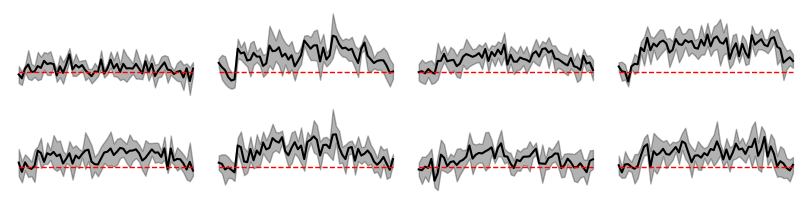

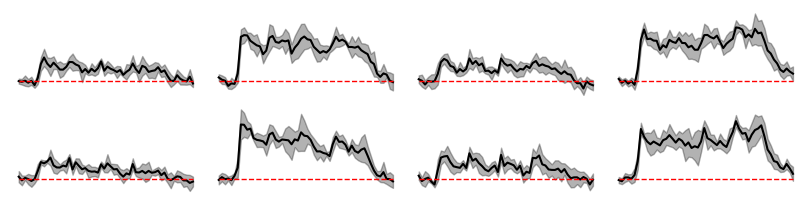

In [12]:
# Excitatory neurons
# sinusoidal flash grating
_data = results['trace_example']['sinusoidal_flash_grating_exc']
plot_response_scalebar(_data, window=[0, 55], auto_baseline=True)

# square flash grating
_data = results['trace_example']['square_flash_grating_exc']
plot_response_scalebar(_data, window=[0, 55], auto_baseline=True)

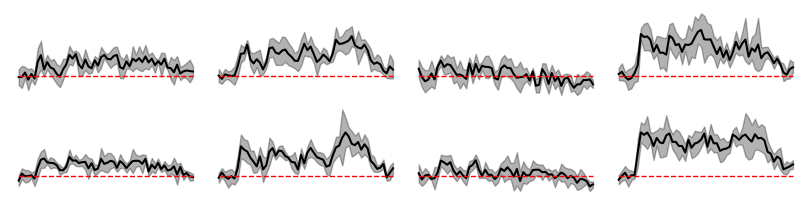

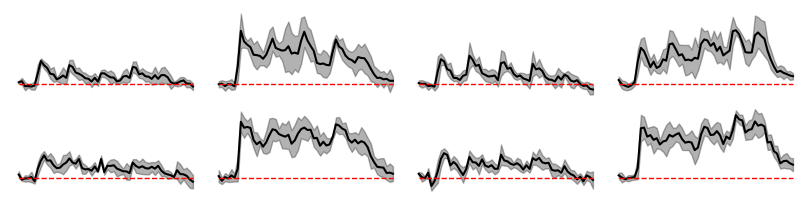

In [13]:
# Inhibitory neurons
# sinusoidal flash grating
_data = results['trace_example']['sinusoidal_flash_grating_inh']
plot_response_scalebar(_data, window=[0, 55], auto_baseline=True)

# square flash grating
_data = results['trace_example']['square_flash_grating_inh']
plot_response_scalebar(_data, window=[0, 55], auto_baseline=True)

fig.1 e

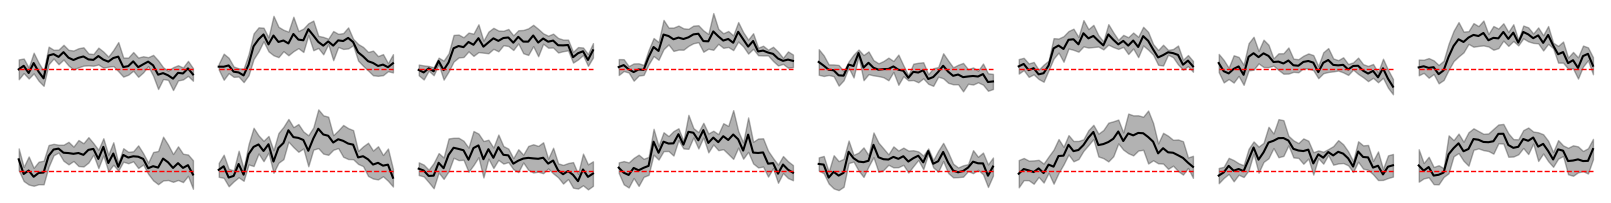

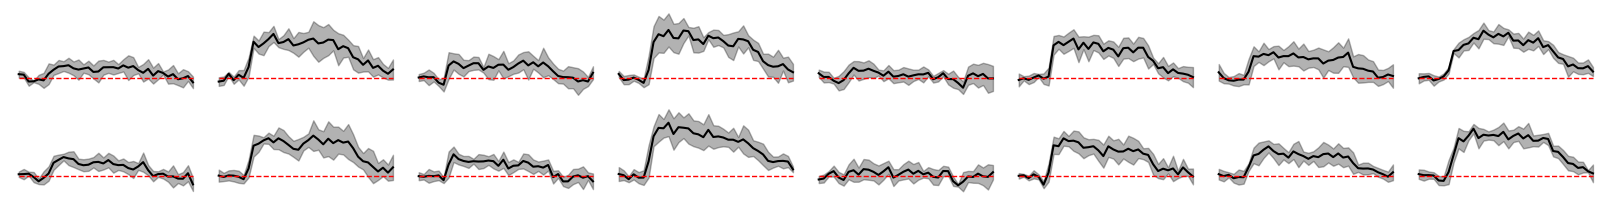

In [14]:
# Excitatory neurons

# sinusoidal flash grating
_data = results['trace_example']['sinusoidal_moving_grating_exc']
plot_response_scalebar(_data, window=[0, 35], auto_baseline=True)

# square flash grating
_data = results['trace_example']['square_moving_grating_exc']
plot_response_scalebar(_data, window=[0, 35], auto_baseline=True)

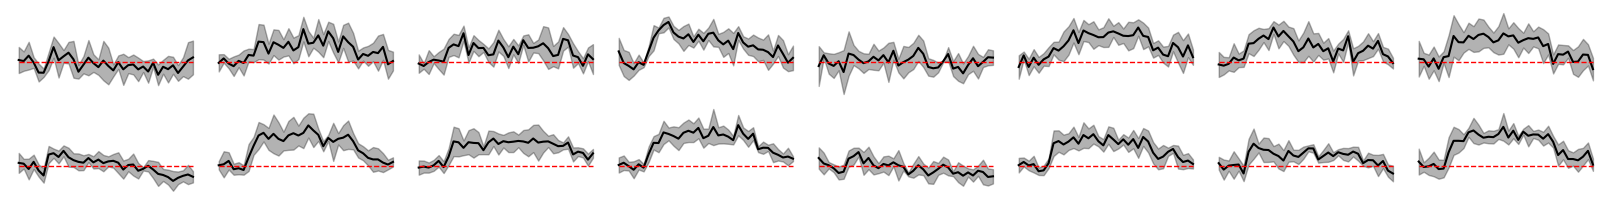

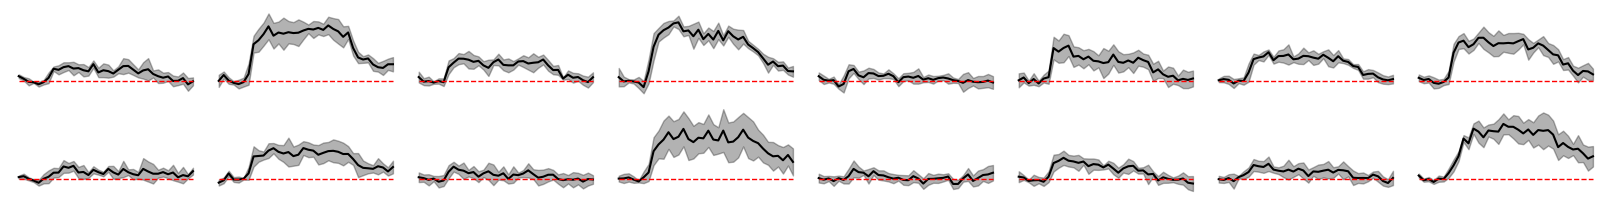

In [15]:
# Inhibitory neurons

# sinusoidal flash grating
_data = results['trace_example']['sinusoidal_moving_grating_inh']
plot_response_scalebar(_data, window=[0, 35], auto_baseline=True)

# square flash grating
_data = results['trace_example']['square_moving_grating_inh']
plot_response_scalebar(_data, window=[0, 35], auto_baseline=True)

### Figure 2

fig.2 a

ylim_max - ylim_min = 1.3717094530914562


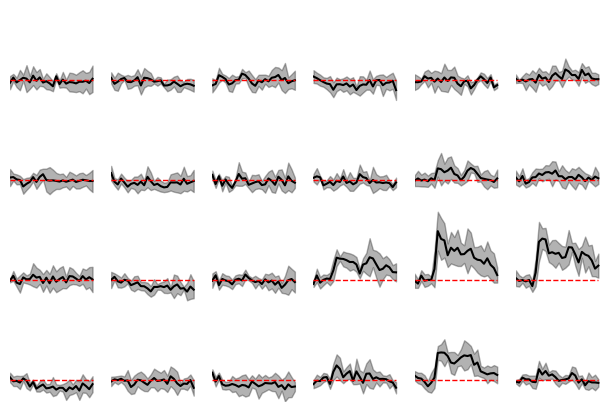

In [17]:
# flash square

data = results['trace_example']['flash_square']
plot_response(data, n_rows=4 ,window=[0, 25], scale_bar=False, title=None)

(33, 2)


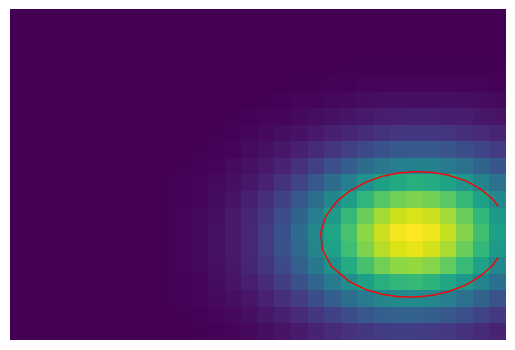

In [18]:
# fitted receptive field

from skimage import measure
data = results['trace_example']['rf_2d_fit']
contour = measure.find_contours(image=data, level=data.max()*0.5)
print(contour[0].shape)

fig, ax = plt.subplots()
ax.set_aspect('equal')
ax.imshow(data)
ax.plot(contour[0][:, 1], contour[0][:, 0], linewidth=1, color='r')
ax.axis('off')
plt.show()

ylim_max - ylim_min = 1.0828093150630593


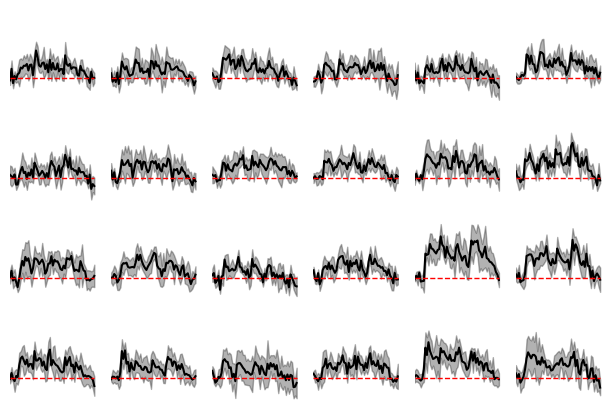

In [19]:
# background orientation is 0 degree
data = results['trace_example']['sinusoidal_flash_grating_0']
plot_response(data, n_rows=4 ,window=[0, 55], scale_bar=False)


ylim_max - ylim_min = 1.069473896175623


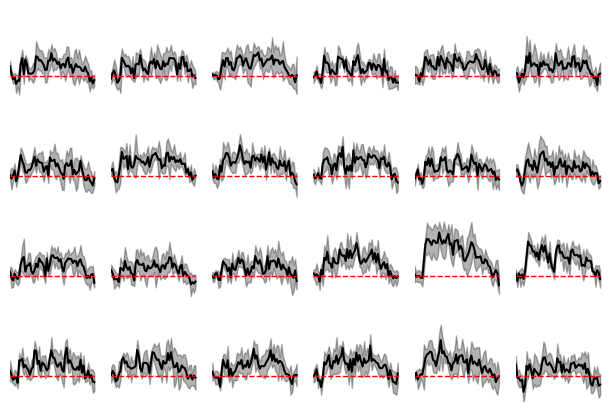

In [20]:
# background orientation is 90 degree
data = results['trace_example']['sinusoidal_flash_grating_90']
plot_response(data, n_rows=4 ,window=[0, 55], scale_bar=False)

fig.2 b

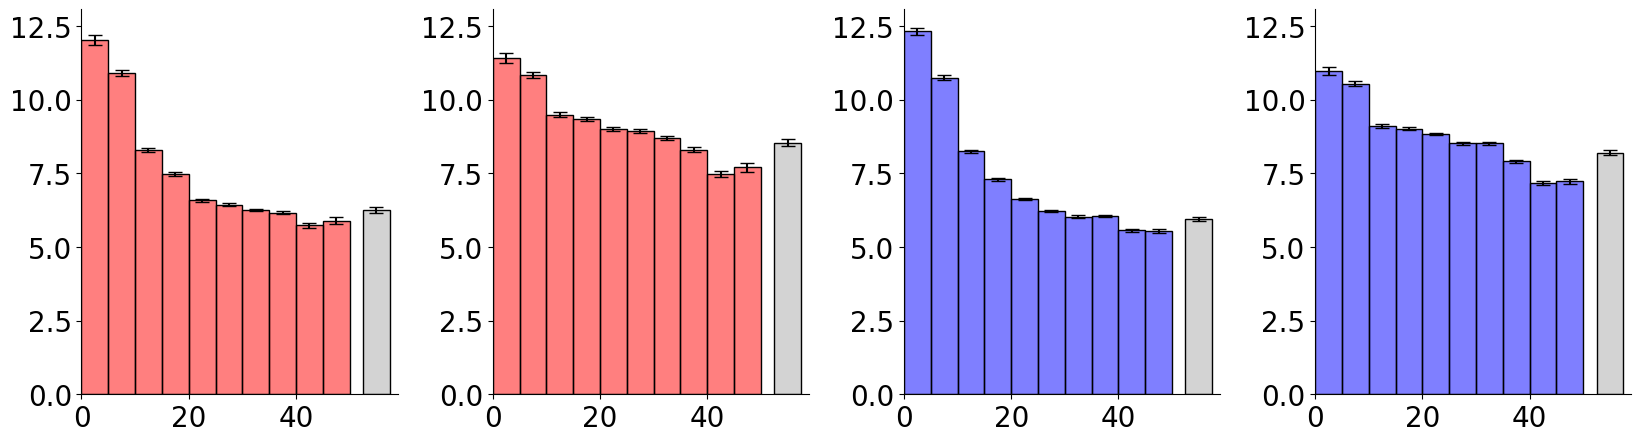

In [21]:
distance_resp(distance_rf_center, sg1_resp_0, sg1_resp_90, sg0_resp_0,
    sg0_resp_90, idx_exc, idx_inh)

fig.2 c

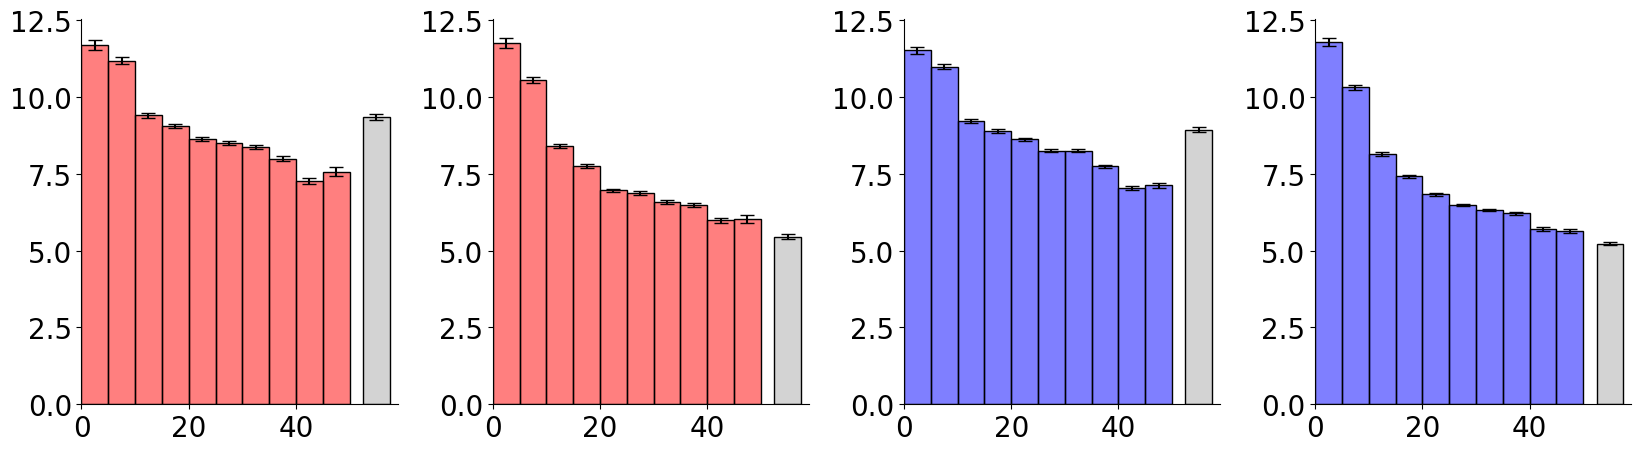

In [22]:
distance_resp(distance_rf_center, sg1_resp_pref, sg1_resp_orth, sg0_resp_pref,
    sg0_resp_orth, idx_exc, idx_inh)

fig.2 d

In [23]:
sg1_si_salient_pref = cal_si(sg1_salient_pref, sg0_resp_pref)
sg1_si_salient_orth = cal_si(sg1_salient_orth, sg0_resp_orth)

sg1_si_salient_pref_higher = np.logical_and(sg1_si_salient_pref>0, sg0_idx_snr)

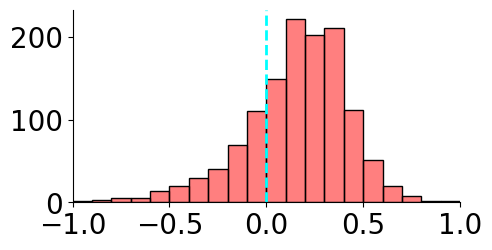

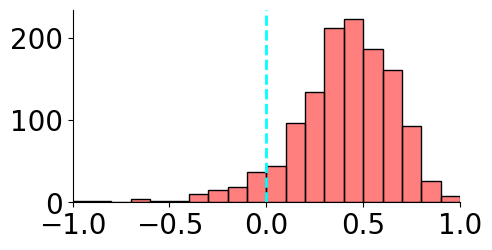

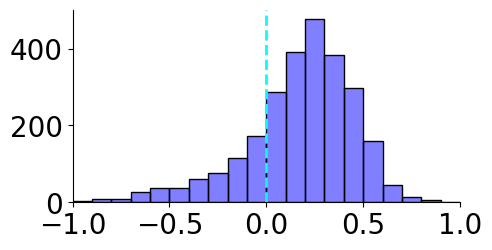

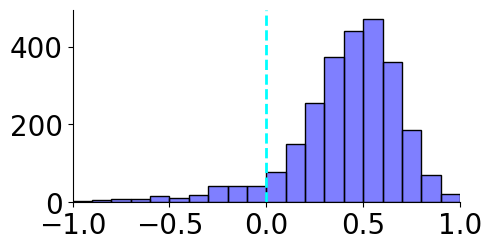

In [24]:
idx_sel = np.logical_and(is_exc_all, sg0_idx_snr)
_data = sg1_si_salient_pref[idx_sel]
hist_customize(_data, xticks=True, color='red', xlim=(-1,1), label=True)

_data = sg1_si_salient_orth[idx_sel]
hist_customize(_data, xticks=True, color='red', xlim=(-1,1), label=True)


idx_sel = np.logical_and(is_inh_all, sg0_idx_snr)
_data = sg1_si_salient_pref[idx_sel]
hist_customize(_data, xticks=True, color='blue', xlim=(-1,1), label=True)

_data = sg1_si_salient_orth[idx_sel]
hist_customize(_data, xticks=True, color='blue', xlim=(-1,1), label=True)


fig.2 e

In [25]:
from analysis_utils import pie_customize

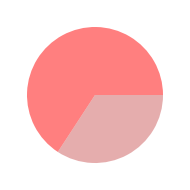

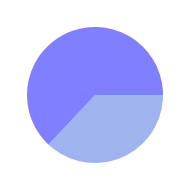

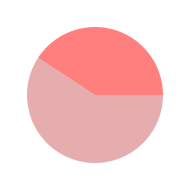

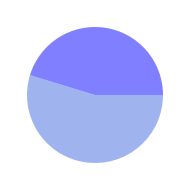

In [26]:
idx_sel = np.logical_and(is_exc_all, sg0_idx_snr)
idx_sel = np.logical_and(idx_sel, sg1_si_salient_pref_all < 0)
pie_customize(sg0_osi_dich[idx_sel], si_thr=0.25, colors=['red', 'indianred'])

idx_sel = np.logical_and(is_inh_all, sg0_idx_snr)
idx_sel = np.logical_and(idx_sel, sg1_si_salient_pref_all < 0)
pie_customize(sg0_osi_dich[idx_sel], si_thr=0.25, colors=['blue', 'royalblue'])

idx_sel = np.logical_and(is_exc_all, sg0_idx_snr)
idx_sel = np.logical_and(idx_sel, sg1_si_salient_pref_all > 0)
pie_customize(sg0_osi_dich[idx_sel], si_thr=0.25, colors=['red', 'indianred'])

idx_sel = np.logical_and(is_inh_all, sg0_idx_snr)
idx_sel = np.logical_and(idx_sel, sg1_si_salient_pref_all > 0)
pie_customize(sg0_osi_dich[idx_sel], si_thr=0.25, colors=['blue', 'royalblue'])

fig.2 f

In [27]:
idx_not_nan = np.logical_not(np.isnan(pref_orth_diff))

p_oneway: 0.15022459480795963


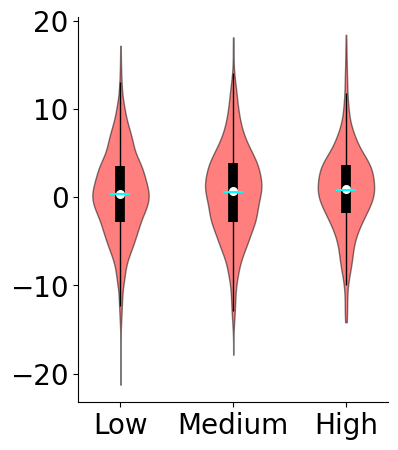

p_oneway: 0.44179545889013816


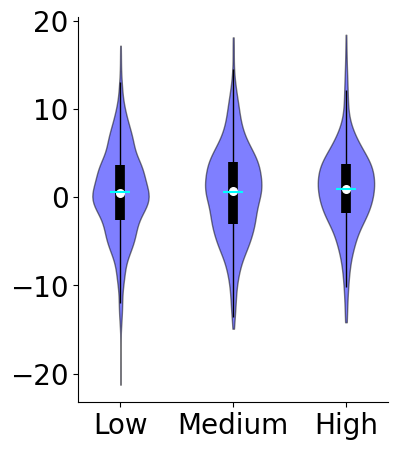

In [ ]:

sg0_osi_dich_high = sg0_osi_dich >= 0.5
sg0_osi_dich_med = np.logical_and(sg0_osi_dich >= 0.25, sg0_osi_dich < 0.5)
sg0_osi_dich_low = sg0_osi_dich < 0.25

idx_sel = np.logical_or(sg_idx_snr, smg_idx_snr)
idx_sel = np.logical_and(idx_sel, idx_not_nan)
idx_sel = np.logical_and(idx_sel, sg1_si_salient_pref_all > 0.0)

idx_high = np.logical_and(idx_sel, sg0_osi_dich_high)
idx_med = np.logical_and(idx_sel, sg0_osi_dich_med)
idx_low = np.logical_and(idx_sel, sg0_osi_dich_low)

bars_loc = [0, 1, 2]
labels = ['Low', 'Medium', 'High']

_, p_oneway = scipy.stats.f_oneway(pref_orth_diff[idx_low], pref_orth_diff[idx_med],pref_orth_diff[idx_high])
print('p_oneway:', p_oneway)

data = [pref_orth_diff[idx_low], pref_orth_diff[idx_med], pref_orth_diff[idx_high]]
violin_plot(data, facecolor='red', labels=labels)

idx_sel = np.logical_or(sg_idx_snr, smg_idx_snr)
idx_sel = np.logical_and(idx_sel, is_inh_all)
idx_sel = np.logical_and(idx_sel, idx_not_nan)
idx_sel = np.logical_and(idx_sel, sg1_si_salient_pref_all > 0.0)

idx_high = np.logical_and(idx_sel, sg0_osi_dich_high)
idx_med = np.logical_and(idx_sel, sg0_osi_dich_med)
idx_low = np.logical_and(idx_sel, sg0_osi_dich_low)

_, p_oneway = scipy.stats.f_oneway(pref_orth_diff[idx_low], pref_orth_diff[idx_med],pref_orth_diff[idx_high])
print('p_oneway:', p_oneway)

data = [pref_orth_diff[idx_low], pref_orth_diff[idx_med], pref_orth_diff[idx_high]]
violin_plot(data, facecolor='blue', labels=labels)

### Figure 3

fig.3 a

ylim_max - ylim_min = 1.2644267082214355
ylim_max - ylim_min = 1.3223268687725067
ylim_max - ylim_min = 1.3674891293048859
ylim_max - ylim_min = 1.434334546327591


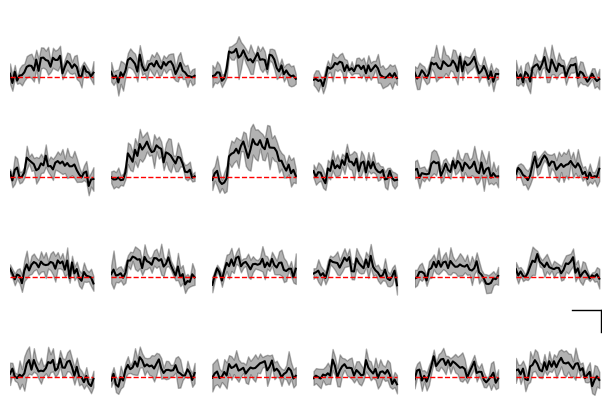

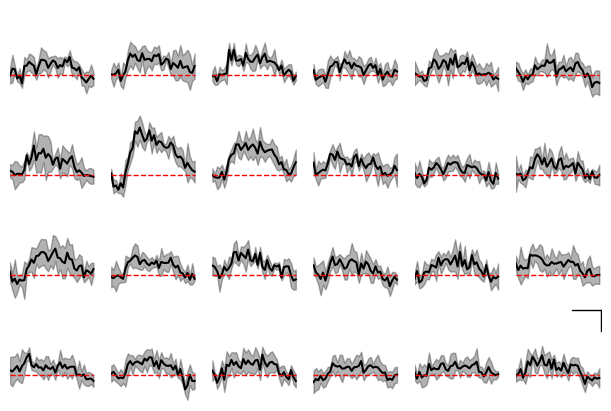

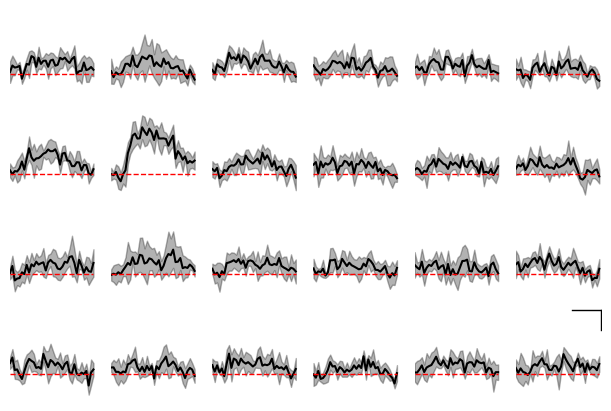

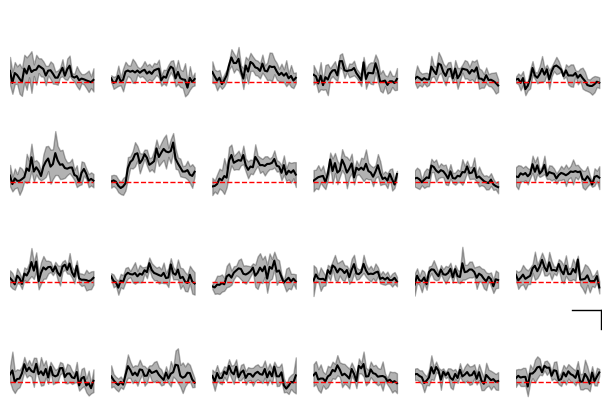

In [30]:
_data = results['trace_example']['sinusoidal_moving_grating_0']
plot_response(_data, n_rows=4, window=[0, 35])

_data = results['trace_example']['sinusoidal_moving_grating_90']
plot_response(_data, n_rows=4, window=[0, 35])

_data = results['trace_example']['sinusoidal_moving_grating_180']
plot_response(_data, n_rows=4, window=[0, 35])

_data = results['trace_example']['sinusoidal_moving_grating_270']
plot_response(_data, n_rows=4, window=[0, 35])

fig.3 b

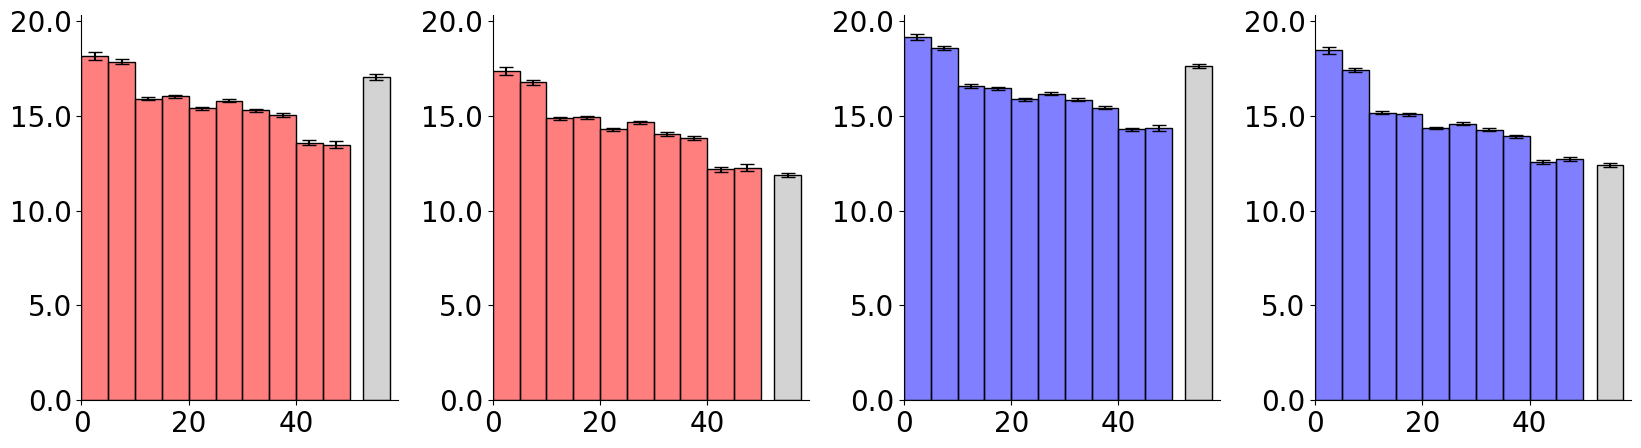

In [31]:
idx_exc = np.logical_and(smg0_idx_snr, is_exc)
idx_inh = np.logical_and(smg0_idx_snr, is_inh)
distance_resp(distance_rf_center, smg1_resp_pref, smg1_resp_null,
    smg0_resp_pref, smg0_resp_null, idx_exc, idx_inh)

fig.3 c

In [32]:
smg1_si_salient_pref = cal_si(smg1_salient_pref, smg0_resp_pref)
smg1_si_salient_null = cal_si(smg1_salient_null, smg0_resp_null)
smg0_dsi_dich = cal_si(smg0_resp_pref, smg0_resp_null)

d:\Github repositories\Wu_SailencyMap_2025\analysis_utils.py:2086: RuntimeWarning: invalid value encountered in divide
  return (x-y)/(x+y)


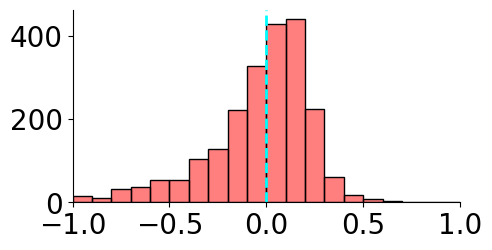

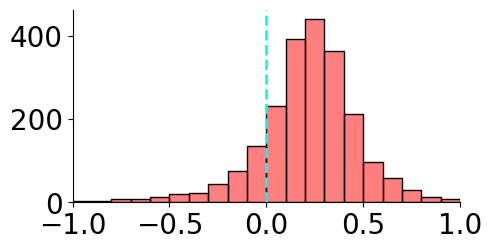

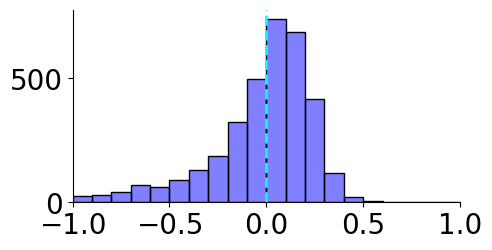

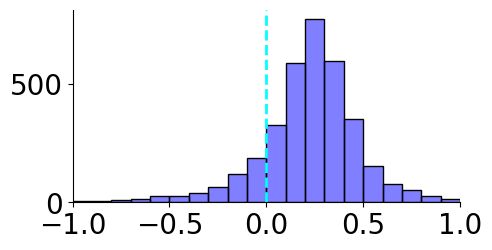

In [33]:
idx_sel = np.logical_and(smg0_idx_snr, is_exc_all)
hist_customize(smg1_si_salient_pref[idx_sel], xticks=True, color='red',
    label=True, xlim=(-1,1))
hist_customize(smg1_si_salient_null[idx_sel], xticks=True, color='red',
    label=True, xlim=(-1,1))

idx_sel = np.logical_and(smg0_idx_snr, is_inh_all)
hist_customize(smg1_si_salient_pref[idx_sel], xticks=True, color='blue',
    label=True, xlim=(-1,1))
hist_customize(smg1_si_salient_null[idx_sel], xticks=True, color='blue',
    label=True, xlim=(-1,1))

fig.3 d

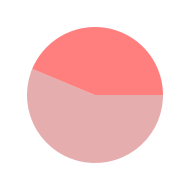

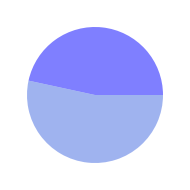

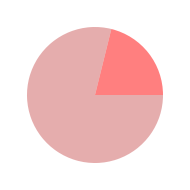

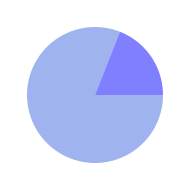

In [34]:
idx_sel = np.logical_and(smg0_idx_snr, is_exc)
idx_sel = np.logical_and(idx_sel, smg1_si_salient_pref < 0.0)
pie_customize(smg0_dsi_dich[idx_sel], si_thr=0.25, colors=['red', 'indianred'])

idx_sel = np.logical_and(smg0_idx_snr, is_inh)
idx_sel = np.logical_and(idx_sel, smg1_si_salient_pref < 0.0)
pie_customize(smg0_dsi_dich[idx_sel], si_thr=0.25, colors=['blue', 'royalblue'])

idx_sel = np.logical_and(smg0_idx_snr, is_exc)
idx_sel = np.logical_and(idx_sel, smg1_si_salient_pref > 0.0)
pie_customize(smg0_dsi_dich[idx_sel], si_thr=0.25, colors=['red', 'indianred'])

idx_sel = np.logical_and(smg0_idx_snr, is_inh)
idx_sel = np.logical_and(idx_sel, smg1_si_salient_pref > 0.0)
pie_customize(smg0_dsi_dich[idx_sel], si_thr=0.25, colors=['blue', 'royalblue'])

fig.3 e

p_oneway: 4.41e-01


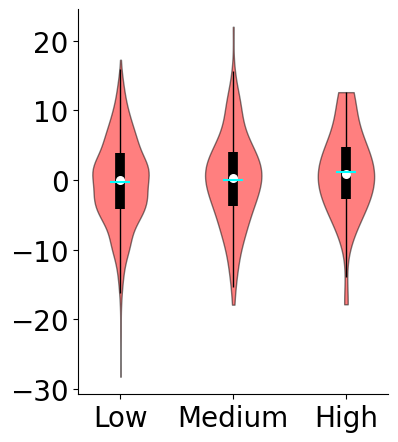

p_oneway: 9.52e-02


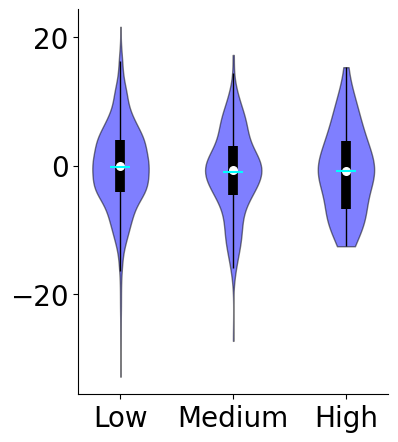

In [ ]:
smg0_dsi_dich_high = smg0_dsi_dich >= 0.5
smg0_dsi_dich_med = np.logical_and(smg0_dsi_dich >= 0.25, smg0_dsi_dich < 0.5)
smg0_dsi_dich_low = smg0_dsi_dich < 0.25

idx_not_nan = np.logical_not(np.isnan(pref_null_diff))

bars_loc = [0, 1, 2]
labels = ['Low', 'Medium', 'High']

idx_sel = np.logical_and(is_exc, smg0_idx_snr)
idx_sel = np.logical_and(idx_sel, idx_not_nan)
idx_sel = np.logical_and(idx_sel, smg1_si_salient_pref > 0.0)
idx_high = np.logical_and(idx_sel, smg0_dsi_dich_high)
idx_med = np.logical_and(idx_sel, smg0_dsi_dich_med)
idx_low = np.logical_and(idx_sel, smg0_dsi_dich_low)

_, p_oneway = scipy.stats.f_oneway(pref_null_diff[idx_low], pref_null_diff[idx_med], pref_null_diff[idx_high])
print('p_oneway: {:.2e}'.format(p_oneway))

data = [pref_null_diff[idx_low], pref_null_diff[idx_med], pref_null_diff[idx_high]]
violin_plot(data, facecolor='red', labels=labels)

idx_sel = np.logical_and(is_inh, smg0_idx_snr)
idx_sel = np.logical_and(idx_sel, idx_not_nan)
idx_sel = np.logical_and(idx_sel, smg1_si_salient_pref > 0.0)
idx_high = np.logical_and(idx_sel, smg0_dsi_dich_high)
idx_med = np.logical_and(idx_sel, smg0_dsi_dich_med)
idx_low = np.logical_and(idx_sel, smg0_dsi_dich_low)

_, p_oneway = scipy.stats.f_oneway(pref_null_diff[idx_low], pref_null_diff[idx_med], pref_null_diff[idx_high])
print('p_oneway: {:.2e}'.format(p_oneway))

data = [pref_null_diff[idx_low], pref_null_diff[idx_med], pref_null_diff[idx_high]]
violin_plot(data, facecolor='blue', labels=labels)

### Figure 4

fig.4 a

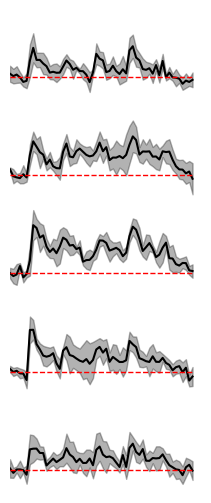

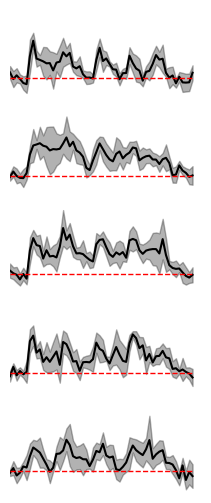

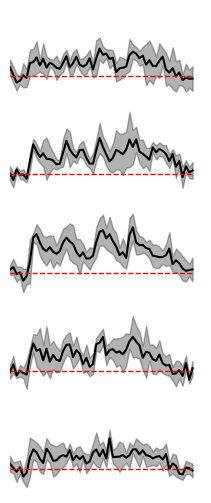

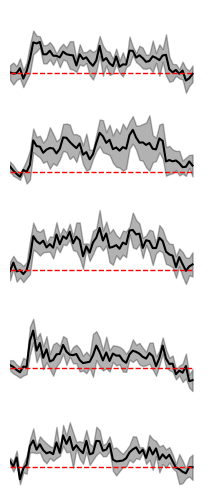

In [36]:
# for excitatory neurons
data = results['trace_example']['square_flash_grating2_exc_0']
plot_response_scalebar(data, window=[0, 55])

data = results['trace_example']['square_flash_grating2_exc_90']
plot_response_scalebar(data, window=[0, 55])

# for inhibitory neurons
data = results['trace_example']['square_flash_grating2_inh_0']
plot_response_scalebar(data, window=[0, 55])

data = results['trace_example']['square_flash_grating2_inh_90']
plot_response_scalebar(data, window=[0, 55])

fig.4 b

In [37]:
not_nan = np.logical_not(np.isnan(sg1_salient_pref))
ori_sel = sg0_osi_all > osi_thr
idx_os = np.logical_and(not_nan, ori_sel)
no_os = sg0_osi_all <= osi_thr
idx_no_os = np.logical_and(not_nan, no_os)

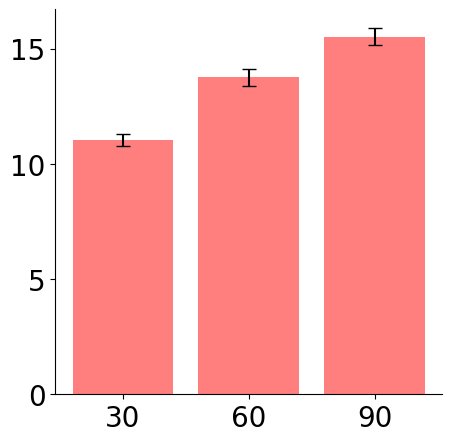

In [ ]:
# neurons in the region of salience center
idx_sel = np.logical_and(rois_sg2_pos_center, is_exc)
idx_sel = np.logical_and(idx_sel, sg0_idx_snr)
idx_sel = np.logical_and(idx_sel, idx_no_os)
idx_sel = np.logical_and(idx_sel, sg1_si_salient_pref > 0)

_data = (sg2_resp_pref[:, idx_sel] + sg2_resp_orth[:, idx_sel]) / 2
_data_30 = (_data[1, :] + _data[-1, :]) / 2
_data_60 = (_data[2, :] + _data[-2, :]) / 2
_data_90 = _data[3, :]
_data = np.vstack((_data_30, _data_60, _data_90))

stim_ori = np.arange(1, 4)

fig, ax = plt.subplots(figsize=(5, 5))

mean = np.mean(_data, axis=1)
sem = scipy.stats.sem(_data, axis=1)

ax.bar(x=stim_ori, height=mean, yerr=sem, capsize=5, alpha=0.5, color='red')
ax.set_xticks(stim_ori, stim_ori*30)
ax.spines[['top', 'right']].set_visible(False)
ax.tick_params(axis='both', which='major', labelsize=20)
plt.show()

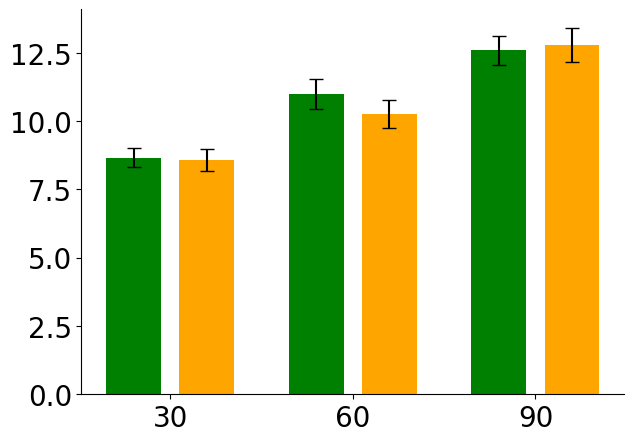

In [39]:
stim_ori = np.arange(1, 4)

idx_sel = np.logical_and(rois_sg2_pos_center, is_exc)
idx_sel = np.logical_and(idx_sel, sg0_idx_snr)
idx_sel = np.logical_and(idx_sel, idx_os)

_pref_30 = (sg2_resp_pref[1, idx_sel] + sg2_resp_pref[-1, idx_sel]) / 2
_pref_60 = (sg2_resp_pref[2, idx_sel] + sg2_resp_pref[-2, idx_sel]) / 2
_pref_90 = sg2_resp_pref[3, idx_sel]

_orth_30 = (sg2_resp_orth[1, idx_sel] + sg2_resp_orth[-1, idx_sel]) / 2
_orth_60 = (sg2_resp_orth[2, idx_sel] + sg2_resp_orth[-2, idx_sel]) / 2
_orth_90 = sg2_resp_orth[3, idx_sel]

fig, ax = plt.subplots(figsize=(7, 5))

_pref = np.vstack((_pref_30, _pref_60, _pref_90))
_orth = np.vstack((_orth_30, _orth_60, _orth_90))

mean = np.mean(_pref, axis=1)
sem = scipy.stats.sem(_pref, axis=1)
ax.bar(x=stim_ori-0.2, height=mean, yerr=sem, capsize=5, color='green',
    alpha=1, width=0.3)

mean = np.mean(_orth, axis=1)
sem = scipy.stats.sem(_orth, axis=1)
ax.bar(x=stim_ori+0.2, height=mean, yerr=sem, capsize=5, color='orange',
    alpha=1, width=0.3)

ax.set_xticks(stim_ori, stim_ori*30)
ax.spines[['top', 'right']].set_visible(False)
ax.tick_params(axis='both', which='major', labelsize=20)

plt.show()

fig.4 c

(6, 8335)


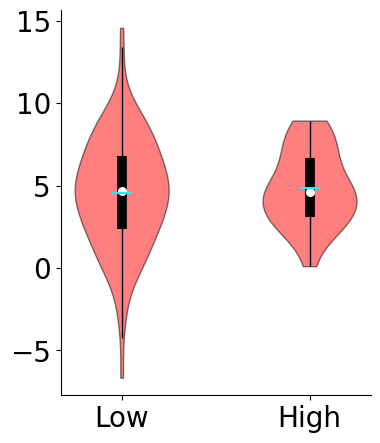

In [40]:
idx_sel = np.logical_and(rois_sg2_pos_center, is_exc)
idx_sel = np.logical_and(idx_sel, sg2_idx_snr)
idx_sel = np.logical_and(idx_sel, sg1_si_salient_pref_higher)

idx_low = np.logical_and(idx_sel, idx_no_os)
idx_high = np.logical_and(idx_sel, idx_os)

sg1_strength_all = (sg2_resp_pref + sg2_resp_orth) / 2
print(sg1_strength_all.shape)

data_osi_low = sg1_strength_all[3, idx_low] - sg1_strength_all[1, idx_low]
data_osi_high = sg1_strength_all[3, idx_high] - sg1_strength_all[1, idx_high]

violin_plot([data_osi_low, data_osi_high], facecolor='red',
    labels=['Low', 'High'])

fig.4 d

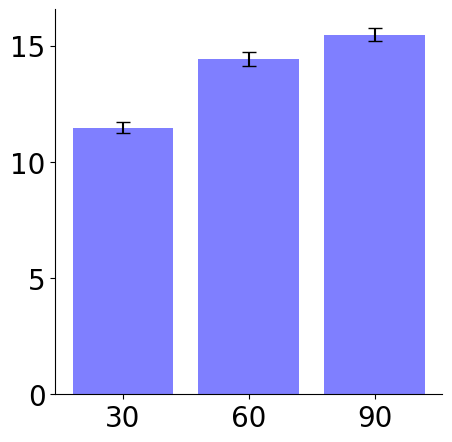

In [41]:
# neurons in the region of salience center
idx_sel = np.logical_and(rois_sg2_pos_center, is_inh)
idx_sel = np.logical_and(idx_sel, sg0_idx_snr)
idx_sel = np.logical_and(idx_sel, idx_no_os)
idx_sel = np.logical_and(idx_sel, sg1_si_salient_pref > 0)

_data = (sg2_resp_pref[:, idx_sel] + sg2_resp_orth[:, idx_sel]) / 2
_data_30 = (_data[1, :] + _data[-1, :]) / 2
_data_60 = (_data[2, :] + _data[-2, :]) / 2
_data_90 = _data[3, :]
_data = np.vstack((_data_30, _data_60, _data_90))

stim_ori = np.arange(1, 4)

fig, ax = plt.subplots(figsize=(5, 5))

mean = np.mean(_data, axis=1)
sem = scipy.stats.sem(_data, axis=1)

ax.bar(x=stim_ori, height=mean, yerr=sem, capsize=5, alpha=0.5, color='blue')
ax.set_xticks(stim_ori, stim_ori*30)
ax.spines[['top', 'right']].set_visible(False)
ax.tick_params(axis='both', which='major', labelsize=20)
plt.show()

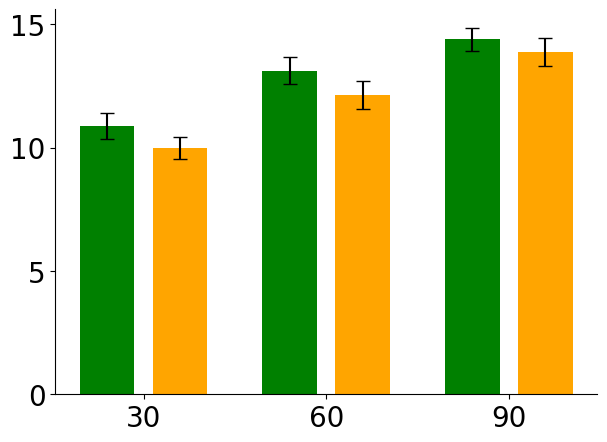

In [42]:
stim_ori = np.arange(1, 4)

idx_sel = np.logical_and(rois_sg2_pos_center, is_inh)
idx_sel = np.logical_and(idx_sel, sg0_idx_snr)
idx_sel = np.logical_and(idx_sel, idx_os)

_pref_30 = (sg2_resp_pref[1, idx_sel] + sg2_resp_pref[-1, idx_sel]) / 2
_pref_60 = (sg2_resp_pref[2, idx_sel] + sg2_resp_pref[-2, idx_sel]) / 2
_pref_90 = sg2_resp_pref[3, idx_sel]

_orth_30 = (sg2_resp_orth[1, idx_sel] + sg2_resp_orth[-1, idx_sel]) / 2
_orth_60 = (sg2_resp_orth[2, idx_sel] + sg2_resp_orth[-2, idx_sel]) / 2
_orth_90 = sg2_resp_orth[3, idx_sel]

fig, ax = plt.subplots(figsize=(7, 5))

_pref = np.vstack((_pref_30, _pref_60, _pref_90))
_orth = np.vstack((_orth_30, _orth_60, _orth_90))

mean = np.mean(_pref, axis=1)
sem = scipy.stats.sem(_pref, axis=1)
ax.bar(x=stim_ori-0.2, height=mean, yerr=sem, capsize=5, color='green',
    alpha=1, width=0.3)

mean = np.mean(_orth, axis=1)
sem = scipy.stats.sem(_orth, axis=1)
ax.bar(x=stim_ori+0.2, height=mean, yerr=sem, capsize=5, color='orange',
    alpha=1, width=0.3)

ax.set_xticks(stim_ori, stim_ori*30)
ax.spines[['top', 'right']].set_visible(False)
ax.tick_params(axis='both', which='major', labelsize=20)

plt.show()

fig.4 e

(6, 8335)


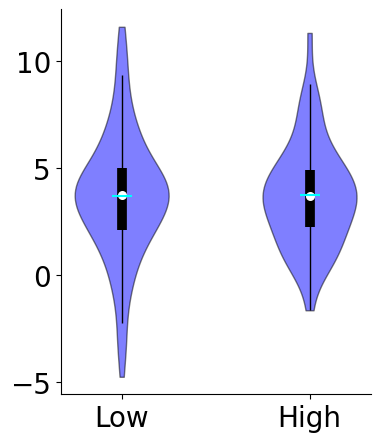

In [ ]:
idx_sel = np.logical_and(rois_sg2_pos_center, is_inh)
idx_sel = np.logical_and(idx_sel, sg2_idx_snr)
idx_sel = np.logical_and(idx_sel, sg1_si_salient_pref_higher)

idx_low = np.logical_and(idx_sel, idx_no_os)
idx_high = np.logical_and(idx_sel, idx_os)

sg1_strength_all = (sg2_resp_pref + sg2_resp_orth) / 2
print(sg1_strength_all.shape)

data_osi_low = sg1_strength_all[3, idx_low] - sg1_strength_all[1, idx_low]
data_osi_high = sg1_strength_all[3, idx_high] - sg1_strength_all[1, idx_high]

violin_plot([data_osi_low, data_osi_high], facecolor='blue',
    labels=['Low', 'High'])

### Figure 5

fig.5 a

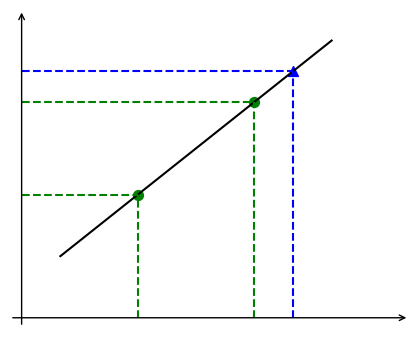

In [43]:
fig, ax = plt.subplots(figsize=(5, 4))

line_x = np.array([0.1, 0.8])
line_y = line_x + 0.1
ax.plot(line_x, line_y, color='black')

points_x = np.array([0.3, 0.6])
points_y = points_x + 0.1
ax.scatter(points_x, points_y, color='green', marker='o', s=50, 
    label='Feature A')
ax.scatter(0.7, 0.8, color='blue', marker='^', s=50, label='Feature B')

ax.hlines(y=points_y, xmin=0, xmax=points_x, linestyles='--', colors='green')
ax.vlines(x=points_x, ymin=0, ymax=points_y, linestyles='--', colors='green')

ax.hlines(y=0.8, xmin=0, xmax=0.7, linestyles='--', colors='blue')
ax.vlines(x=0.7, ymin=0, ymax=0.8, linestyles='--', colors='blue')

ax.annotate('', xy=(1,0), xytext=(-0.03, 0), arrowprops={'arrowstyle': '->'},
    va='center', annotation_clip=True)
ax.annotate('', xy=(0,1), xytext=(0, -0.03), arrowprops={'arrowstyle': '->'},
    va='center', annotation_clip=True)

ax.set_xlim(left=0, right=1)
ax.set_ylim(bottom=0, top=1)
ax.set_xticks([])
ax.set_yticks([])
ax.spines[['top', 'bottom','right', 'left']].set_visible(False)
plt.show()

fig.5 b

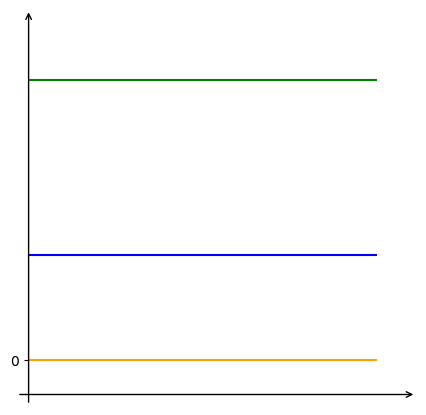

In [44]:
from matplotlib.offsetbox import AnchoredOffsetbox, TextArea, HPacker, VPacker

fig, ax = plt.subplots(figsize=(5, 5))

ax.set_xticks([])
ax.set_yticks([0])

# x-axis label
xbox1 = TextArea("OSI ", textprops=dict(color="orange", size=15))
xbox2 = TextArea("DSI ", textprops=dict(color="orange", size=15))
xbox3 = TextArea("MSI", textprops=dict(color="blue", size=15))
xbox4 = TextArea("/ ", textprops=dict(color="black", size=15))

xbox = HPacker(children=[xbox1, xbox4, xbox2, xbox4, xbox3],
                  align="center", pad=0, sep=5)

anchored_xbox = AnchoredOffsetbox(loc=3, child=xbox, pad=0., frameon=False,
                                      bbox_to_anchor=(0.3, -0.07),
                                      bbox_transform=ax.transAxes, borderpad=0.)

ax.annotate('', xy=(1,-0.1), xytext=(-0.03, -0.1), 
    arrowprops={'arrowstyle': '->'}, va='center', annotation_clip=True)
ax.annotate('', xy=(0,1), xytext=(0, -0.13), arrowprops={'arrowstyle': '->'},
    va='center', annotation_clip=True)

ax.set_xlim(0, 1)
ax.set_ylim(-0.1, 1)

hline_locs = [0, 0.3, 0.8]
colors = ['orange', 'blue', 'green']
ax.hlines(y=hline_locs, xmin=0, xmax=0.9, color=colors)

ax.spines[['top', 'bottom', 'right', 'left']].set_visible(False)
plt.show()

fig.5 c

In [45]:
msi = cal_si(smg0_resp_pref, sg0_resp_pref)

idx_sg1_snr_exc = np.logical_and(sg1_idx_snr, is_exc)
idx_sg1_snr_inh = np.logical_and(sg1_idx_snr, is_inh)
idx_smg1_snr_exc = np.logical_and(smg1_idx_snr, is_exc)
idx_smg1_snr_inh = np.logical_and(smg1_idx_snr, is_inh)

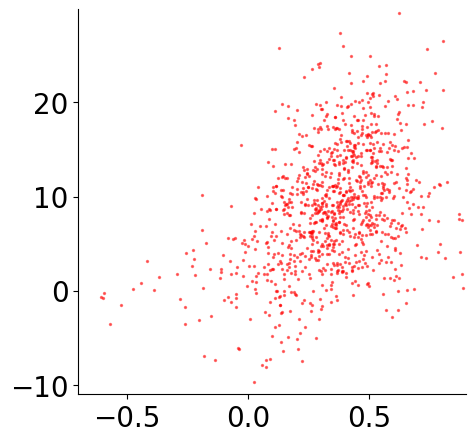

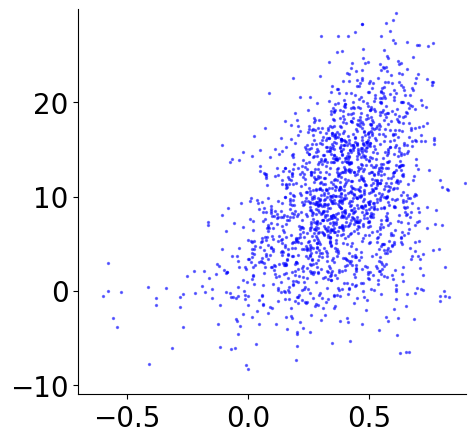

In [46]:
idx_sel = np.logical_or(idx_sg1_snr_exc, idx_smg1_snr_exc)
idx_sel = np.logical_and(idx_sel, sg1_si_salient_pref > 0)
idx_sel = np.logical_and(idx_sel, smg1_si_salient_pref > 0)

xlim = (-0.7, 0.9)
ylim = (-11, 29.9)
_x = np.clip(msi, a_min=xlim[0], a_max=xlim[1])
_y = np.clip(sg1_smg1_diff, a_min=ylim[0], a_max=ylim[1])

scatter_polyfit(_x[idx_sel], _y[idx_sel], dot_color='red',
    xlim=xlim, ylim=ylim, fit_line_color='cyan')

idx_sel = np.logical_or(idx_sg1_snr_inh, idx_smg1_snr_inh)
idx_sel = np.logical_and(idx_sel, sg1_si_salient_pref > 0)
idx_sel = np.logical_and(idx_sel, smg1_si_salient_pref > 0)

scatter_polyfit(_x[idx_sel], _y[idx_sel], dot_color='blue',
    xlim=xlim, ylim=ylim, fit_line_color='cyan')

fig.5 d

In [47]:
idx_not_nan = np.logical_not(np.isnan(sg1_smg1_diff))
idx_msi_high = msi >= 0.5
idx_msi_middle = np.logical_and(msi >= 0.25, msi < 0.5)
idx_msi_low = msi < 0.25

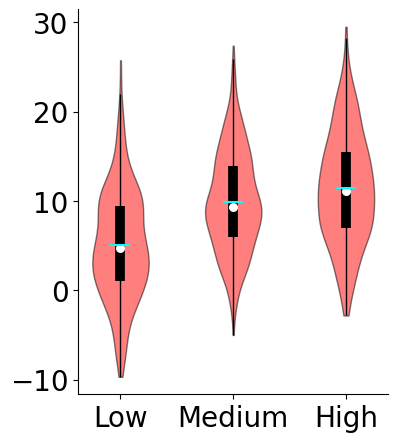

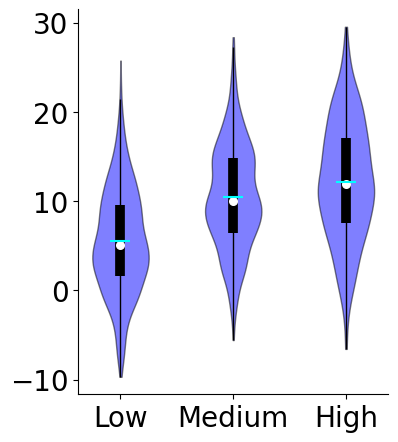

In [48]:
bars_loc = [0, 1, 2]
labels = ['Low', 'Medium', 'High']

idx_sel = np.logical_or(idx_sg1_snr_exc, idx_smg1_snr_exc)
idx_sel = np.logical_and(idx_sel, idx_not_nan)
idx_sel = np.logical_and(idx_sel, sg1_si_salient_pref > 0)
idx_sel = np.logical_and(idx_sel, smg1_si_salient_pref > 0)
idx_high = np.logical_and(idx_sel, idx_msi_high)
idx_med = np.logical_and(idx_sel, idx_msi_middle)
idx_low = np.logical_and(idx_sel, idx_msi_low)

data = [sg1_smg1_diff[idx_low], sg1_smg1_diff[idx_med], sg1_smg1_diff[idx_high]]
violin_plot(data, facecolor='red', labels=labels)

idx_sel = np.logical_or(idx_sg1_snr_inh, idx_smg1_snr_exc)
idx_sel = np.logical_and(idx_sel, idx_not_nan)
idx_sel = np.logical_and(idx_sel, sg1_si_salient_pref > 0)
idx_sel = np.logical_and(idx_sel, smg1_si_salient_pref > 0)
idx_high = np.logical_and(idx_sel, idx_msi_high)
idx_med = np.logical_and(idx_sel, idx_msi_middle)
idx_low = np.logical_and(idx_sel, idx_msi_low)

data = [sg1_smg1_diff[idx_low], sg1_smg1_diff[idx_med], sg1_smg1_diff[idx_high]]
violin_plot(data, facecolor='blue', labels=labels)

fig.5 e

In [49]:
idx_sg0_snr_exc = np.logical_and(sg0_idx_snr, is_exc)
idx_sg0_snr_inh = np.logical_and(sg0_idx_snr, is_inh)

idx_smg0_snr_exc = np.logical_and(smg0_idx_snr, is_exc)
idx_smg0_snr_inh = np.logical_and(smg0_idx_snr, is_inh)

sg1_si_salient_mean = (sg1_si_salient_pref + sg1_si_salient_orth) * 0.5
smg1_si_salient_mean = (smg1_si_salient_pref + smg1_si_salient_null) * 0.5

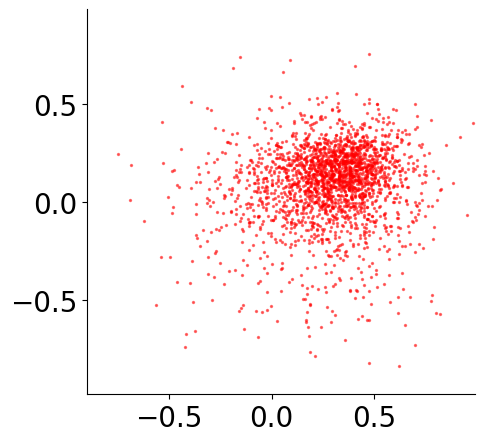

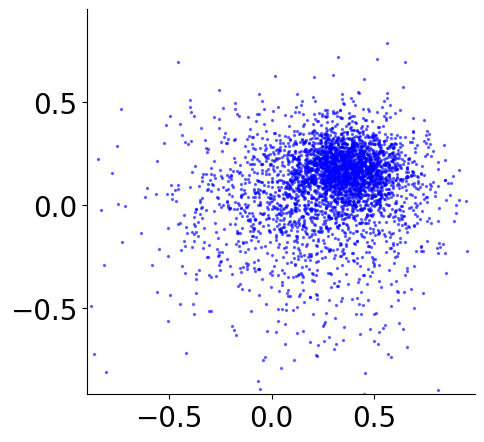

In [50]:
idx_sel = np.logical_or(idx_sg0_snr_exc, idx_smg0_snr_exc)
scatter_polyfit(sg1_si_salient_mean[idx_sel], smg1_si_salient_mean[idx_sel],
    dot_color='red', xlim=(-0.9, 0.99), fit_line_color='cyan')

idx_sel = np.logical_or(idx_sg0_snr_inh, idx_smg0_snr_inh)
scatter_polyfit(sg1_si_salient_mean[idx_sel], smg1_si_salient_mean[idx_sel],
    dot_color='blue', xlim=(-0.9, 0.99), fit_line_color='cyan')

### Figure 6

fig.6 a

In [ ]:
from analysis_utils import amp_plot_bicolor
from analysis_utils import arrow_plot_bicolor
from analysis_utils import line_plot_bicolor

In [52]:
_is_exc = results['map']['is_exc']
rois_pos = results['map']['rois_pos']
_sg0_osi = results['map']['sg0_osi']
sg0_pref_ori = results['map']['sg0_pref_ori']
sg0_snr_sel = results['map']['sg0_snr_sel']

_smg0_dsi = results['map']['smg0_dsi']
smg0_pref_dir = results['map']['smg0_pref_dir']

_sg1_si_salient_mean = results['map']['sg1_si_salient_mean']
_smg1_si_salient_mean = results['map']['smg1_si_salient_mean']

sg1_snr_exc = np.logical_and(results['map']['sg1_snr'], _is_exc)
sg1_snr_inh = np.logical_and(results['map']['sg1_snr'], np.logical_not(_is_exc))

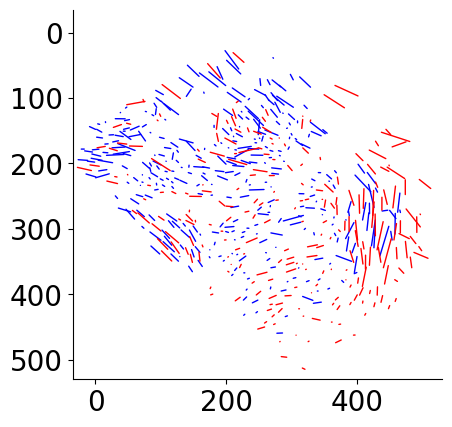

In [53]:
_dict = {'pref_ori': sg0_pref_ori, 'osi': _sg0_osi}
line_plot_bicolor(_dict, rois_pos, roi_sel=sg0_snr_sel,
    cell_type=_is_exc, only_pref=False, line_length_input=5)

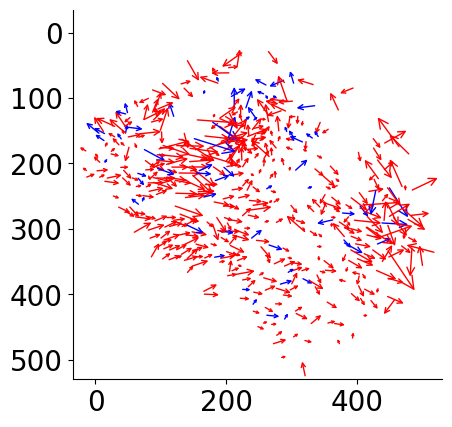

In [54]:
_dict = {'pref_dir': smg0_pref_dir, 'dsi': _smg0_dsi}
arrow_plot_bicolor(_dict, rois_pos, roi_sel=sg0_snr_sel, type=is_exc,
    line_length_input=10, only_pref=False, si_thr=0.05)

In [ ]:
amp_plot_bicolor(_sg1_si_salient_mean, rois_pos, sg1_snr_exc, sg1_snr_inh)
amp_plot_bicolor(_smg1_si_salient_mean, rois_pos, sg1_snr_exc, sg1_snr_inh)

fig.6 b

In [56]:
from analysis_utils import binned_mean

In [57]:
distances_exc = results['summary']['distances_exc']
distances_inh = results['summary']['distances_inh']

sg1_delta_si_exc = results['summary']['sg1_delta_si_exc']
sg1_delta_si_inh = results['summary']['sg1_delta_si_inh']

smg1_delta_si_exc = results['summary']['smg1_delta_si_exc']
smg1_delta_si_inh = results['summary']['smg1_delta_si_inh']

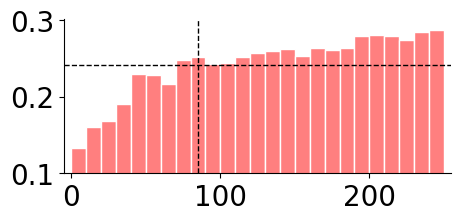

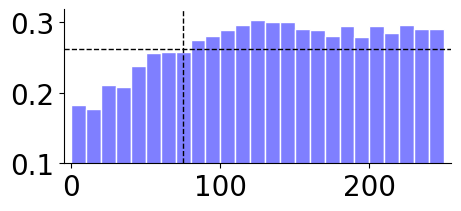

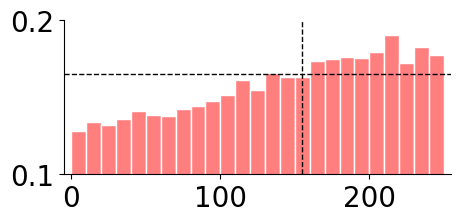

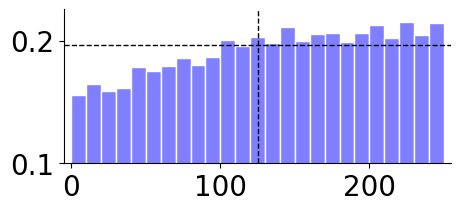

In [58]:
binned_mean(distances_exc, sg1_delta_si_exc, 'red')
binned_mean(distances_inh, sg1_delta_si_inh, 'blue')

binned_mean(distances_exc, smg1_delta_si_exc, 'red')
binned_mean(distances_inh, smg1_delta_si_inh, 'blue')

fig.6 c

In [60]:
sg1_si_salient_pref_all_ori = results['summary']['sg1_si_salient_pref_all_ori']
sg1_si_salient_orth_all_ori = results['summary']['sg1_si_salient_orth_all_ori']

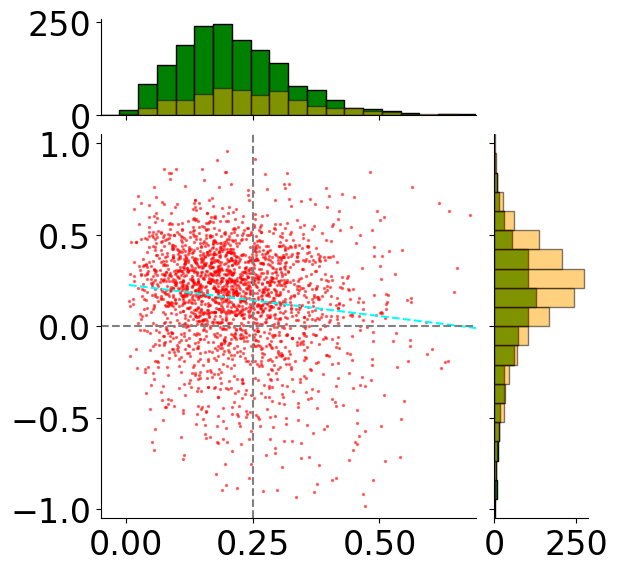

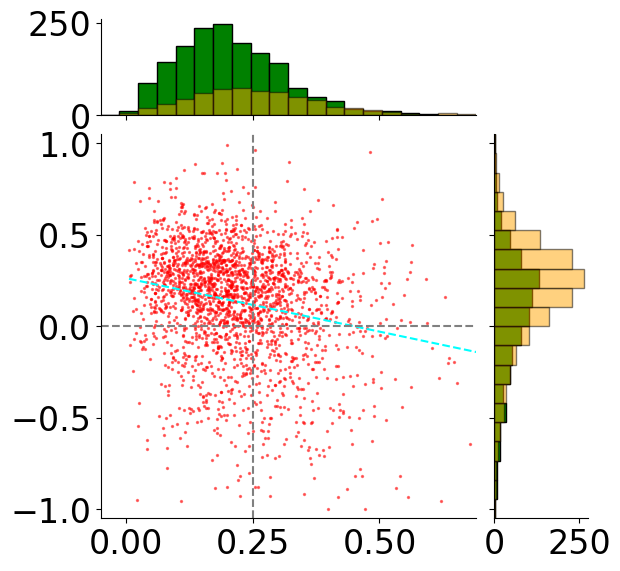

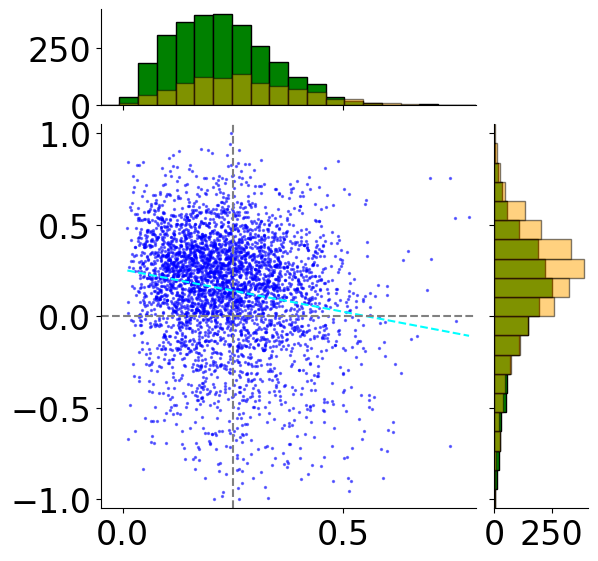

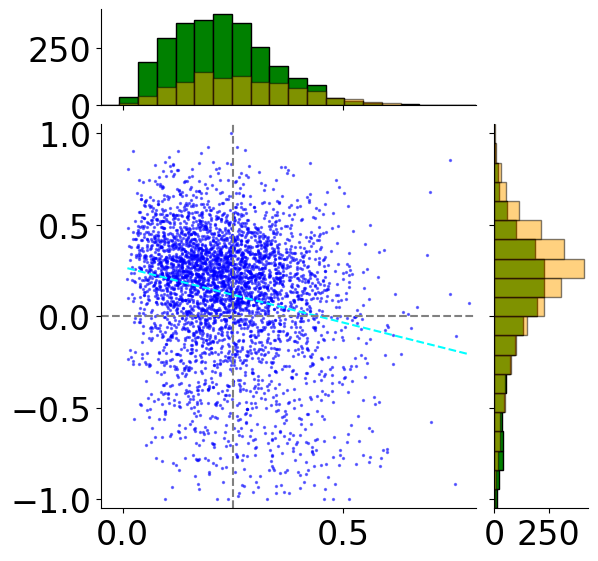

In [61]:
idx_sel = np.logical_and(sg1_idx_snr, is_exc)

scatter_hist(sg0_osi[idx_sel], sg1_si_salient_pref_all_ori[idx_sel],
    label_r=False,  identical_line=False, fit_line=True, exclude_zero=False,
    title=None, dot_color='red', xlim=[-0.05, 0.69], fit_line_color='cyan',
    ylim=[-1.05, 1.05], vline=0.25, hline=0)
scatter_hist(sg0_osi[idx_sel], sg1_si_salient_orth_all_ori[idx_sel],
    label_r=False, identical_line=False, fit_line=True, exclude_zero=False,
    title=None, dot_color='red', xlim=[-0.05, 0.69], fit_line_color='cyan',
    ylim=[-1.05, 1.05], vline=0.25, hline=0)

idx_sel = np.logical_and(sg1_idx_snr, is_inh)

scatter_hist(sg0_osi[idx_sel], sg1_si_salient_pref_all_ori[idx_sel],
    label_r=False,  identical_line=False, fit_line=True, exclude_zero=False,
    title=None, dot_color='blue', xlim=[-0.05, 0.8], fit_line_color='cyan',
    ylim=[-1.05, 1.05], vline=0.25, hline=0)
scatter_hist(sg0_osi[idx_sel], sg1_si_salient_orth_all_ori[idx_sel],
    label_r=False, identical_line=False, fit_line=True, exclude_zero=False,
    title=None, dot_color='blue', xlim=[-0.05, 0.8], fit_line_color='cyan',
    ylim=[-1.05, 1.05], vline=0.25, hline=0)

fig.6 d

In [62]:
smg0_dsi = results['summary']['smg0_dsi']
smg1_si_salient_pref_all_dir = results['summary']['smg1_si_salient_pref_all_dir']
smg1_si_salient_null_all_dir = results['summary']['smg1_si_salient_null_all_dir']


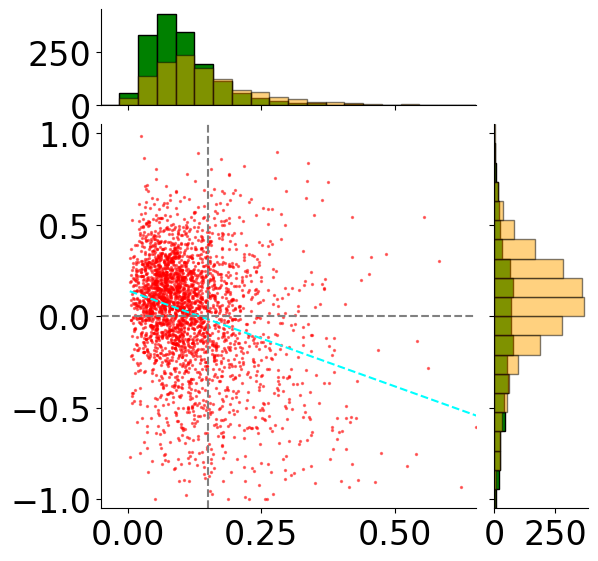

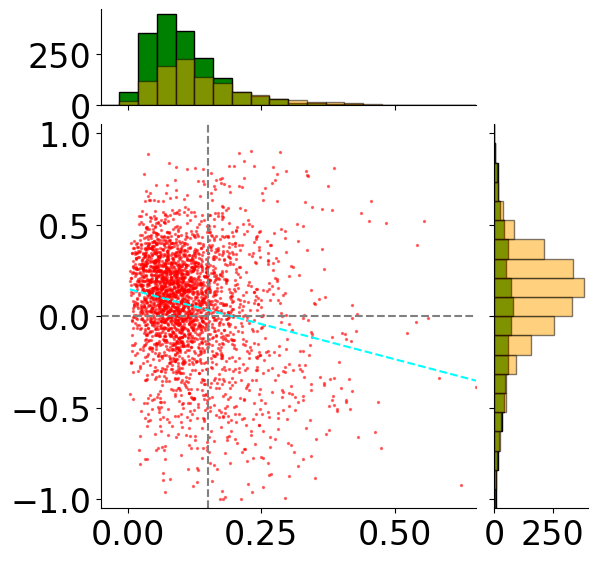

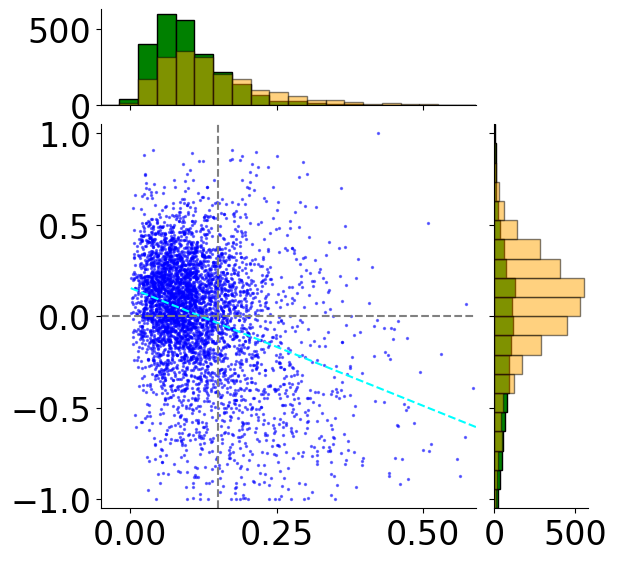

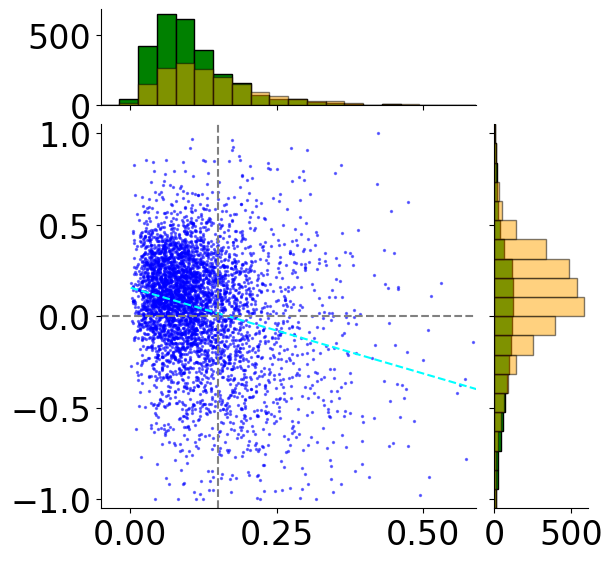

In [63]:
idx_sel = np.logical_and(smg1_idx_snr, is_exc)
scatter_hist(smg0_dsi[idx_sel], smg1_si_salient_pref_all_dir[idx_sel],
    label_r=False,  identical_line=False, fit_line=True, exclude_zero=False,
    title=None, dot_color='red', xlim=[-0.05, 0.65], fit_line_color='cyan',
    ylim=[-1.05, 1.05], vline=0.15, hline=0)
scatter_hist(smg0_dsi[idx_sel], smg1_si_salient_null_all_dir[idx_sel],
    label_r=False, identical_line=False, fit_line=True, exclude_zero=False,
    title=None, dot_color='red', xlim=[-0.05, 0.65], fit_line_color='cyan',
    ylim=[-1.05, 1.05], vline=0.15, hline=0)

idx_sel = np.logical_and(smg1_idx_snr, is_inh)
scatter_hist(smg0_dsi[idx_sel], smg1_si_salient_pref_all_dir[idx_sel],
    label_r=False,  identical_line=False, fit_line=True, exclude_zero=False,
    title=None, dot_color='blue', xlim=[-0.05, 0.59], fit_line_color='cyan',
    ylim=[-1.05, 1.05], vline=0.15, hline=0)
scatter_hist(smg0_dsi[idx_sel], smg1_si_salient_null_all_dir[idx_sel],
    label_r=False, identical_line=False, fit_line=True, exclude_zero=False,
    title=None, dot_color='blue', xlim=[-0.05, 0.59], fit_line_color='cyan',
    ylim=[-1.05, 1.05], vline=0.15, hline=0)

### Figure 7

fig.7 a

In [64]:
from analysis_utils import trace_compare

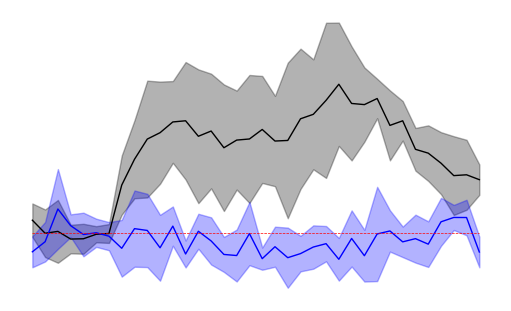

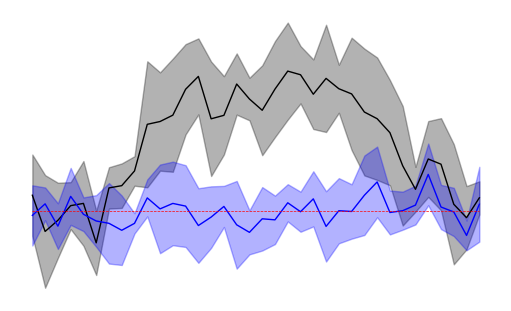

In [65]:
data = results['trace_example']['sinusoidal_moving_grating_v1_1']
trace_compare(data)
data = results['trace_example']['sinusoidal_moving_grating_v1_2']
trace_compare(data)

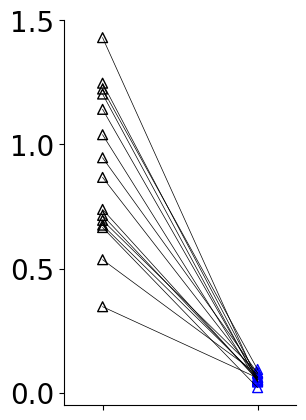

In [66]:
data = results['trace_example']['sinusoidal_moving_grating_v1_amp']

fig, ax = plt.subplots(figsize=(3, 5))

xticks = np.arange(2)
ax.scatter(np.zeros(data[0].size) + xticks[0], data[0], s=50,
    marker='^', facecolors='none', edgecolors='black')
ax.scatter(np.zeros(data[1].size) + xticks[1], data[1], s=50,
    marker='^', facecolors='none', edgecolors='blue')
ax.plot(data, color='black', lw=0.5)
ax.spines[['top', 'right']].set_visible(False)
ax.tick_params(labelsize=20)

ax.set_xticks(xticks, labels=[])
ax.set_xlim(-0.25, 1.25)

plt.show()

fig.7 b

162 230 247


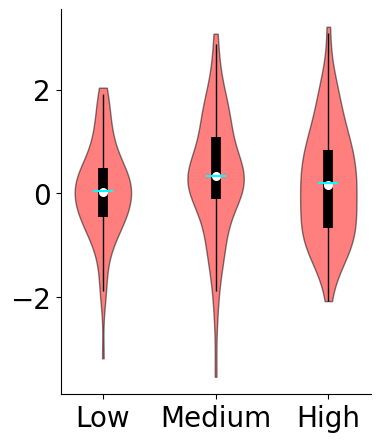

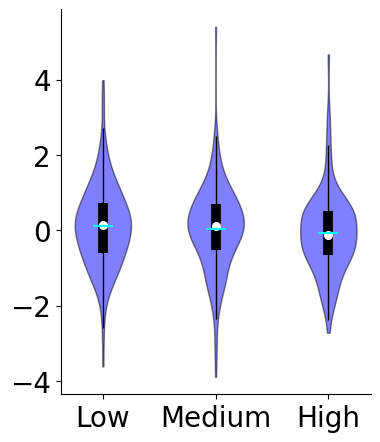

In [ ]:
_is_exc = results['silence']['is_exc']
pref_orth_diff = results['silence']['pref_orth_diff']
sg0_osi_dich = results['silence']['sg0_osi_dich']

idx_not_nan = np.logical_not(np.isnan(pref_orth_diff))
sg0_osi_dich_high = sg0_osi_dich >= 0.5
sg0_osi_dich_med = np.logical_and(sg0_osi_dich >= 0.25, sg0_osi_dich < 0.5)
sg0_osi_dich_low = sg0_osi_dich < 0.25
print(sg0_osi_dich_high.sum(), sg0_osi_dich_med.sum(), sg0_osi_dich_low.sum())

idx_sel = _is_exc

idx_sel = np.logical_and(idx_sel, idx_not_nan)

idx_high = np.logical_and(idx_sel, sg0_osi_dich_high)
idx_med = np.logical_and(idx_sel, sg0_osi_dich_med)
idx_low = np.logical_and(idx_sel, sg0_osi_dich_low)

data = [pref_orth_diff[idx_low], pref_orth_diff[idx_med],
    pref_orth_diff[idx_high]]
violin_plot(data, facecolor='red', labels=labels)

idx_sel = np.logical_not(_is_exc)
idx_sel = np.logical_and(idx_sel, idx_not_nan)
idx_high = np.logical_and(idx_sel, sg0_osi_dich_high)
idx_med = np.logical_and(idx_sel, sg0_osi_dich_med)
idx_low = np.logical_and(idx_sel, sg0_osi_dich_low)

data = [pref_orth_diff[idx_low], pref_orth_diff[idx_med], pref_orth_diff[idx_high]]
violin_plot(data, facecolor='blue', labels=labels)

fig.7 c

In [69]:
sg_snr_before = results['silence']['sg_snr_before']
sg_snr_after = results['silence']['sg_snr_after']
sg1_si_pref_before = results['silence']['sg1_si_pref_before']
sg1_si_pref_after = results['silence']['sg1_si_pref_after']

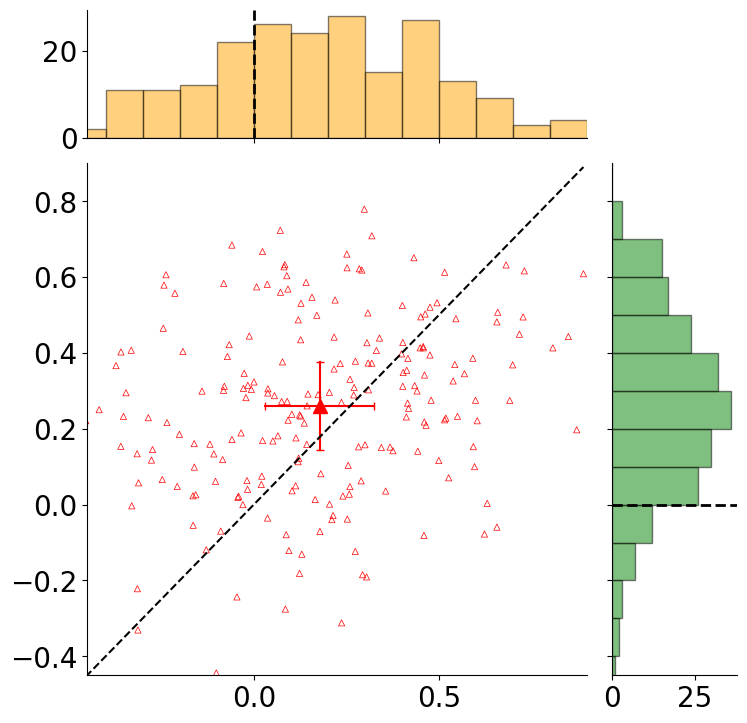

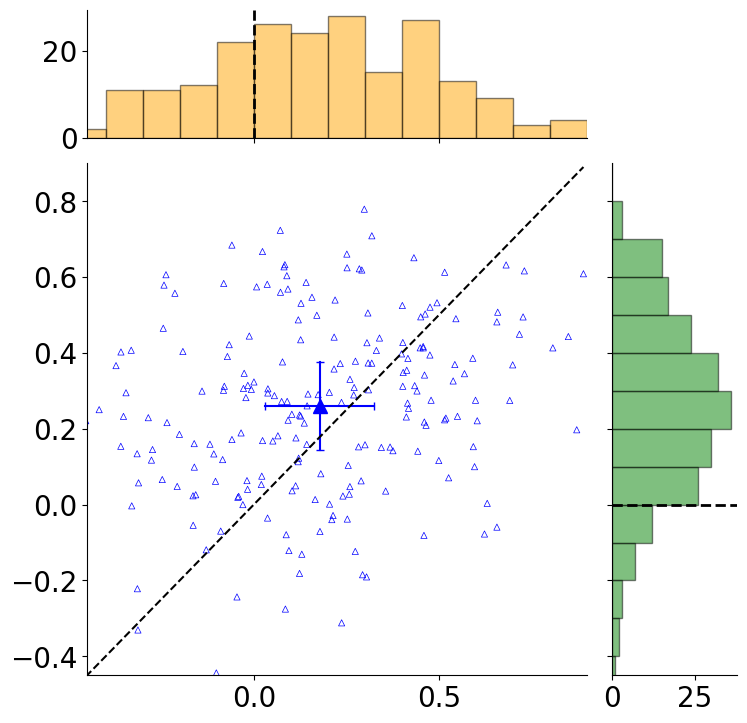

In [70]:

from analysis_utils import scatter_hist_usual

idx = _is_exc
idx_snr = np.logical_or(sg_snr_before, sg_snr_after)

scatter_hist_usual(sg1_si_pref_before[idx], sg1_si_pref_after[idx],
    identical_line=True, xlim=(-0.45, 0.9), ylim=(-0.45, 0.9), dot_color='red')

idx_sel = np.logical_not(_is_exc)
scatter_hist_usual(sg1_si_pref_before[idx], sg1_si_pref_after[idx], 
    identical_line=True, xlim=(-0.45, 0.9), ylim=(-0.45, 0.9), dot_color='blue')